In [1]:
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'

WORKING_DIR = os.getcwd()
os.chdir(f'{WORKING_DIR}/../')
WORKING_DIR

'/home/yiqinzhao/Documents/CS539_final_proj/evaluation'

In [2]:
from keras.optimizers import adam_v2 as adam
from datasets.loader import DatasetSequence
from model.network import model
from model.utils import contrastive_loss
from keras.metrics import BinaryAccuracy

2021-12-14 10:46:05.647293: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-14 10:46:05.655762: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-14 10:46:05.656932: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-14 10:46:05.658531: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [3]:
adam = adam.Adam()
model.compile(loss=contrastive_loss,
              optimizer=adam,
              metrics=[BinaryAccuracy()])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 7680)]       0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 sequential (Sequential)        (None, 512)          4097012     ['input_2[0][0]']                
                                                                                                  
 sequential_1 (Sequential)      (None, 512)          26393724    ['input_3[0][0]']            

In [4]:
model.fit(DatasetSequence('train', 50),
          validation_data=DatasetSequence('valid', 50),
          epochs=5, verbose=1)

Epoch 1/5


2021-12-14 10:46:18.265800: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2021-12-14 10:46:18.409747: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8301


200/200 [==============================] - 377s 2s/step - loss: 0.7489 - binary_accuracy: 0.4729 - val_loss: 0.2253 - val_binary_accuracy: 0.3640
Epoch 2/5
200/200 [==============================] - 317s 2s/step - loss: 0.1781 - binary_accuracy: 0.2568 - val_loss: 0.1726 - val_binary_accuracy: 0.2660
Epoch 3/5
200/200 [==============================] - 317s 2s/step - loss: 0.1390 - binary_accuracy: 0.1815 - val_loss: 0.1424 - val_binary_accuracy: 0.1830
Epoch 4/5
200/200 [==============================] - 311s 2s/step - loss: 0.1187 - binary_accuracy: 0.1456 - val_loss: 0.1378 - val_binary_accuracy: 0.1860
Epoch 5/5
200/200 [==============================] - 308s 2s/step - loss: 0.1056 - binary_accuracy: 0.1238 - val_loss: 0.1388 - val_binary_accuracy: 0.1880


In [5]:
test_loader = DatasetSequence('test', 2)

In [14]:
test_loader[0][0][0].shape

(2, 7680)

In [10]:
from PIL import Image

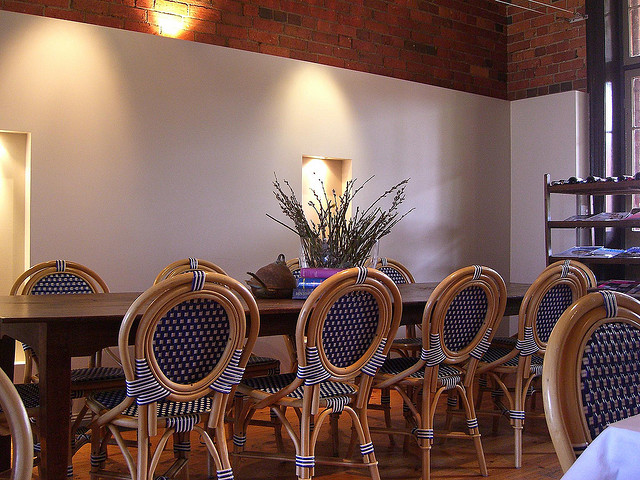

In [11]:
Image.open('./datasets/train/0/image.jpg')

In [ ]:
yp = model.predict(test_loader[0])